### SMS Spam Classification
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
##### Dataset Link
[https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset]

In [1]:
import numpy as np
import pandas as pd
import re

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#reading the data

data=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

##### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#check for null values

data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#we need to drop last 3 columns 

data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Renaming the columns 

data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
data.sample(5)

,target,text
2337,ham,Tell your friends what you plan to do on Valen...
400,spam,FREE RINGTONE text FIRST to 87131 for a poly o...
1446,ham,Looks like u wil b getting a headstart im leav...
2805,ham,Can a not?
4990,ham,We made it! Eta at taunton is 12:30 as planned...


In [11]:
#to make the target variables numeric 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['target']=le.fit_transform(data['target'])

In [12]:
data.sample(5)

#0 = ham 
#1 = spam

,target,text
3293,0,Beautiful tomorrow never comes.. When it comes...
1991,0,No other Valentines huh? The proof is on your ...
5205,1,Had your mobile 11mths ? Update for FREE to Or...
4075,1,87077: Kick off a new season with 2wks FREE go...
4566,0,But you were together so you should be thinkin...


In [13]:
#check for duplicate

data.duplicated().sum()

403

In [14]:
#remove duplicates

data=data.drop_duplicates(keep='first')

#### Exploitary Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

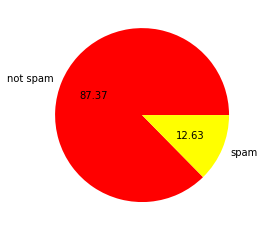

In [16]:
#ham & spam in pie chart

plt.pie(data['target'].value_counts(),labels=['not spam','spam'],colors=['red','yellow'],autopct='%0.2f')
plt.show()

In [17]:
# data is imbalanced

In [18]:
# adding columns for 1)no of char 2)no. of word 3)no of sentence

In [19]:
import nltk

In [20]:
#number of charecters

data['no_characters'] = data['text'].apply(len)

In [21]:
data.sample(5)

,target,text,no_characters
1068,1,Someone U know has asked our dating service 2 ...,134
8,1,WINNER!! As a valued network customer you have...,158
3375,0,"Good afternon, my love. How are today? I hope ...",151
4872,0,Lol! Oops sorry! Have fun.,27
2013,1,Great News! Call FREEFONE 08006344447 to claim...,120


In [22]:
#number of words 

import nltk.data
from nltk.stem.porter import PorterStemmer

In [23]:
data['no_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
data.sample(5)

,target,text,no_characters,no_words
2130,0,Later i guess. I needa do mcat study too.,41,11
207,0,"Aight yo, dats straight dogg",28,6
51,0,"A gram usually runs like &lt;#&gt; , a half e...",124,35
2751,0,Play w computer? Aiyah i tok 2 u lor?,37,11
2303,0,Should I tell my friend not to come round til ...,66,20


In [25]:
#number of sentence

data['no_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.sample(5)

,target,text,no_characters,no_words,no_sentences
3628,0,Should I head straight there or what,36,7,1
2682,0,I got a call from a landline number. . . I am ...,106,28,7
3136,0,You're right I have now that I think about it,45,11,1
2994,0,Mm not entirely sure i understood that text bu...,71,16,3
1075,0,Oi. Ami parchi na re. Kicchu kaaj korte iccha ...,83,23,6


In [27]:
#statistical checking

data[['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# ham

data[data['target'] == 0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# spam

data[data['target'] == 1][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### Data Visulaization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='no_characters', ylabel='Count'>

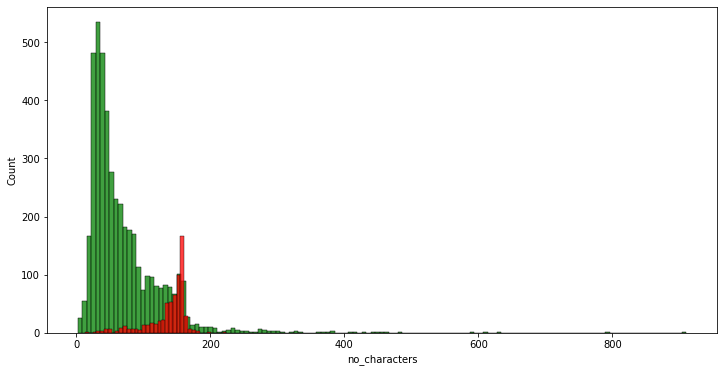

In [31]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#ham
sns.histplot(data[data['target'] == 0]['no_characters'],color='green')
#spam
sns.histplot(data[data['target'] == 1]['no_characters'],color='red')

<AxesSubplot: xlabel='no_words', ylabel='Count'>

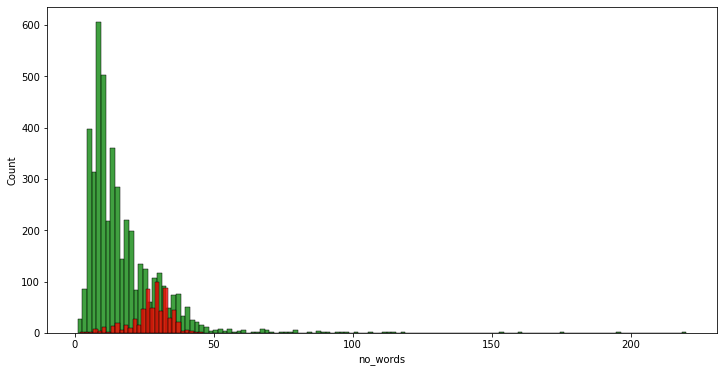

In [32]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#ham
sns.histplot(data[data['target'] == 0]['no_words'],color='green')
#spam
sns.histplot(data[data['target'] == 1]['no_words'],color='red')

<ipython-input-33-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

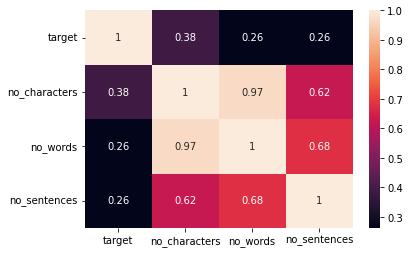

In [33]:
sns.heatmap(data.corr(),annot=True)

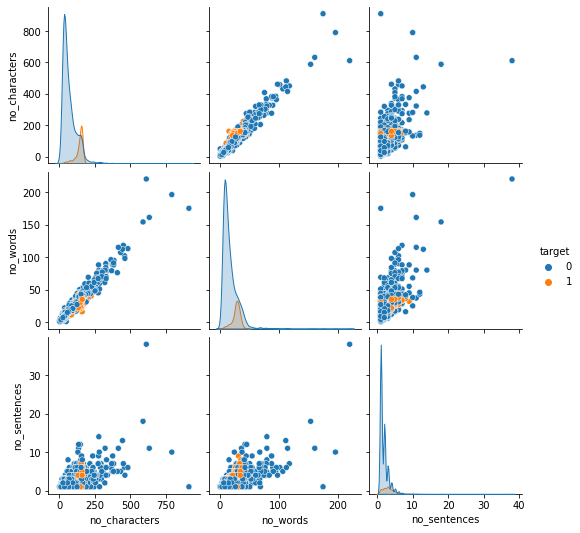

In [34]:
sns.pairplot(data,hue='target')

#### Data Preprocessing

In [35]:
import nltk

In [36]:
#stopwords array

spw=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [37]:
# function for following processes

def transform_text(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #Removing stop words and punctuation
    from nltk.corpus import stopwords
    import string
    for i in text:
        if i not in spw and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon talk stuff tonight cri today'

In [39]:
data['transformed_text'] = data['text'].apply(transform_text)

In [40]:
data.sample(10)

,target,text,no_characters,no_words,no_sentences,transformed_text
3023,0,I love ya too but try and budget your money be...,90,21,2,love ya budget money babe gari freak knew
897,0,I'm used to it. I just hope my agents don't dr...,154,39,3,hope agent drop book thing year boston nyc experi
2906,0,ALRITE,6,1,1,alrit
377,0,Well there's not a lot of things happening in ...,131,28,1,lot thing happen lindsay year sigh bar ptbo bl...
3107,0,Hello hun how ru? Its here by the way. Im good...,149,39,6,hun good 2 date guy met walkabout meet how
3718,1,"Thanks for your ringtone order, reference numb...",197,38,4,rington order refer number x49 mobil charg ton...
714,0,He also knows about lunch menu only da. . I know,48,12,3,lunch menu
4442,0,You know my old Dom I told you about yesterday...,141,34,3,dom told yesterday roger touch night meet today 2
848,0,Yeah there's barely enough room for the two of...,105,25,2,yeah bare room fuck shoe man
3872,0,"Happy or sad , one thing about past is- \Its n...",76,23,1,happi sad thing good morn


In [41]:
#to see the spam words

from wordcloud import WordCloud

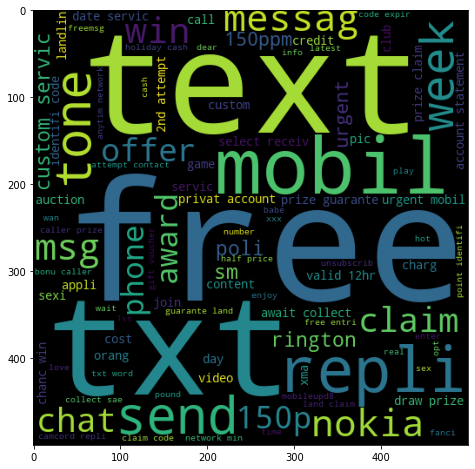

In [42]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
spam_words = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,8))
plt.imshow(spam_words)

## Model Building 

In [43]:
#to convert the texts in a vector ()

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()                                         #bag of words
tfidf = TfidfVectorizer(max_features=3000)                     #tf-idf

In [44]:
M=cv.fit_transform(data['transformed_text']).toarray()

In [45]:
M.shape

(5169, 6356)

In [46]:
#input

x = tfidf.fit_transform(data['transformed_text']).toarray()

In [47]:
x.shape

(5169, 3000)

In [48]:
#output

y = data['target'].values

In [49]:
y.shape

(5169,)

Spliting the training and testing data 

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#### we will use 3 types of naive bayes method for this classification problem
##### later we will use voting classifier for aggregation

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
#Gasssian naive bayes 

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8375241779497099
0.4409448818897638


In [53]:
#Multinomial naive bayes 

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9748549323017408
0.9912280701754386


In [54]:
#Bernouli naive bayes 

bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.97678916827853
0.9596774193548387


###### using voting classifier 

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('gnb',gnb),('mnb', mnb), ('bnb',bnb)],voting='soft')
voting.fit(x_train,y_train)

y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9913793103448276


### Function to check a Messege spam or not on the basis of our Model

In [56]:
def isSpam(s):
    s=re.sub(pattern='[^a-zA-Z]',repl=' ',string=s)          #to make alphaneumeric
    s=s.lower()                                              #to make lowercase
    s_words = s.split()                                      #to divide in words
    s_words=[word for word in s_words if not word in spw]    #deleting the stopwords
    ps = PorterStemmer()
    message=[ps.stem(word) for word in s_words]              #stemming
    message = ' '.join(message)                              #creating the original messege
    temp=tfidf.transform([message]).toarray()                #vectorizing
    return voting.predict(temp)    

In [57]:
ans=['Broo, this is a SPAM!','Ohhh, this is a normal message.']

Cheking

In [58]:
msg="FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
if isSpam(msg):
    print(ans[0])
else:
    print(ans[1])

Broo, this is a SPAM!


In [59]:
msg="I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."
if isSpam(msg):
    print(ans[0])
else:
    print(ans[1])

Ohhh, this is a normal message.


In [60]:
msg="Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!"
if isSpam(msg):
    print(ans[0])
else:
    print(ans[1])

Ohhh, this is a normal message.


In [61]:
msg="You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) "
if isSpam(msg):
    print(ans[0])
else:
    print(ans[1])

Broo, this is a SPAM!


#### So, Our Model and isSpam method both doing Preety Well, Now Let's save the model

### Model Saving

In [62]:
import pickle
pickle.dump(voting,open('model.pkl','wb'))

# Thank You